#Import danych

In [123]:
! git clone https://github.com/KrystynaKan/szkolenie.git

fatal: destination path 'szkolenie' already exists and is not an empty directory.


https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset - Wykorzystanie metody uczenia maszynowego w klasyfikacji nasion dyni. Zasoby genetyczne i ewoluacja upraw.

**Wykorzystanie metody uczenia maszynowego w klasyfikacji nasion dyni. Zasoby genetyczne i ewoluacja upraw.Pestki dyni są bogate w odpowiednią ilość białka, tłuszczu, węglowodanów i składników mineralnych.Badania przeprowadzono na dwóch najważniejszych jakościowo gatunkach nasion dyni: Urgup Sivrisi i Cercevelik. Powszechnie uprawiane są w regionach Urgup i Karacaoren w Turcji. Biorąc pod uwagę cechy morfologiczne 2500 nasion dyni obu odmian, wszystkie dane poddaliśmy modelowaniu poznanych metod uczenia maszynowego nadzorowanego (klasyfikacja):.**

*  regresja logistyczna
*  regularyzacja L2
*   KNN
*   SVM
*   Bagging Classifier

**które określiły najbardziej skuteczną metodę klasyfikacji odmian nasion dyni.**

In [124]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
import plotly
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [126]:
data = pd.read_excel('szkolenie/Pumpkin_Seeds_Dataset.xlsx')

In [127]:
data.sample(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
1205,94907,1165.418,447.2711,271.3401,95558,347.6195,0.7950,0.9932,0.7462,0.8781,1.6484,0.7772,Çerçevelik
2009,99484,1325.349,572.9679,222.0452,100347,355.9030,0.9219,0.9914,0.7615,0.7117,2.5804,0.6212,Ürgüp Sivrisi
2486,54426,903.456,363.7880,190.8668,54880,263.2439,0.8513,0.9917,0.6485,0.8379,1.9060,0.7236,Ürgüp Sivrisi
1953,63802,1045.580,445.5165,183.6349,64434,285.0179,0.9111,0.9902,0.7386,0.7334,2.4261,0.6397,Ürgüp Sivrisi
60,106862,1253.488,492.4942,277.4770,107521,368.8644,0.8262,0.9939,0.7391,0.8547,1.7749,0.7490,Çerçevelik
1603,75111,1209.036,534.5789,181.0821,76216,309.2480,0.9409,0.9855,0.7663,0.6457,2.9521,0.5785,Ürgüp Sivrisi
2338,73528,1120.983,470.4879,200.6111,74343,305.9718,0.9045,0.9890,0.6730,0.7353,2.3453,0.6503,Ürgüp Sivrisi
1874,103569,1388.145,603.9720,220.3183,104809,363.1365,0.9311,0.9882,0.5145,0.6754,2.7414,0.6012,Ürgüp Sivrisi
373,84227,1116.774,432.3185,249.1444,85078,327.4769,0.8172,0.9900,0.6747,0.8487,1.7352,0.7575,Çerçevelik
1869,78337,1137.150,469.5190,213.7619,79233,315.8192,0.8903,0.9887,0.5744,0.7613,2.1965,0.6726,Ürgüp Sivrisi


Nazwy kolumn:
*  Area - powierzchnia
*  Perimter - obwód
*  Major_Axis_Length - długość osi głównej
*  Minor_Axis_Length - długość osi podrzędnej
*  Convex_Area - obszar wypukły
*  Equiv_Diameter - równa średnica 
*  Eccentricity - ekscentryczność
*  Solidity - solidność
*  Extent - zakres
*  Roundness - okrągłość
*  Aspect_Ration - współczynnik proporcji
*  Compactness - ścisłość
*  Class - klasa

In [128]:
data.describe(include=['object'])

,Class
count,2500
unique,2
top,Çerçevelik
freq,1300


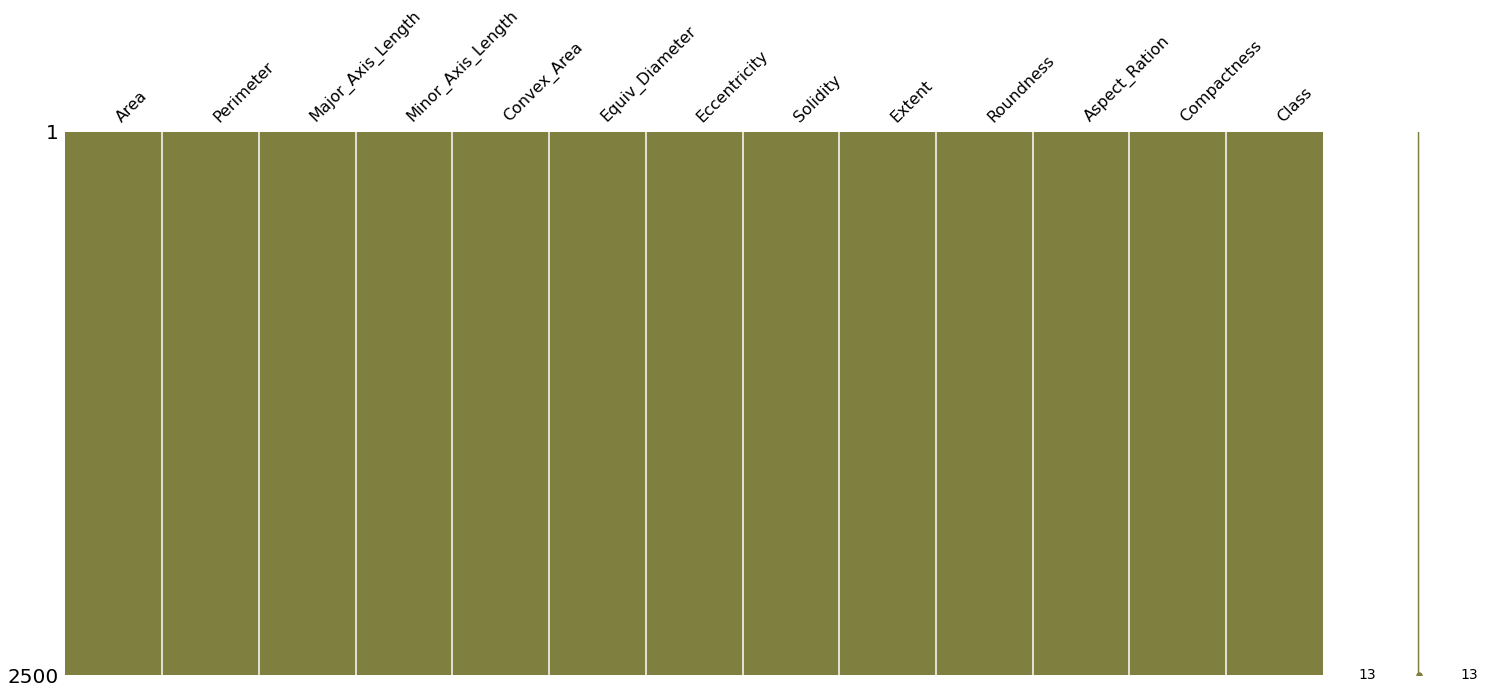

In [129]:
import missingno as msno  #czy są jakieś missingi- braki
msno.matrix(data, color=(0.5, 0.5, 0.25))

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [131]:
X = data.drop('Class', axis=1)
y = data['Class']

In [132]:
y

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

In [133]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [134]:
y.value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

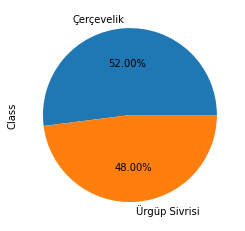

In [135]:
data["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [136]:
# cm = np.corrcoef(data.iloc[:,0:12].values.T)

# heatmap = sns.heatmap(cm, annot=True)
# plt.show()

# Podział na zbiór testowy i treningowy

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [138]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2000, 12)
X_test shape: (500, 12)
y_train shape: (2000,)
y_test shape: (500,)


# Modyfikacja danych - zmiana klas na liczbowe + StandardScaler

In [139]:
# y_train = pd.get_dummies(y_train, columns=['Class'], drop_first=True)
y_train = y_train.replace('Çerçevelik',0)
y_train = y_train.replace('Ürgüp Sivrisi',1)
# 'Çerçevelik' = 0
# 'Ürgüp Sivrisi' = 1

In [140]:
y_train

1718    1
33      0
1774    1
38      0
551     0
       ..
884     0
1429    1
2059    1
277     0
1479    1
Name: Class, Length: 2000, dtype: int64

'Çerçevelik' = 0 <br>
'Ürgüp Sivrisi' = 1

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [142]:
sc = StandardScaler()    #w przypadku standard scalera należy pamiętać o wyborze tylko kolumn z wartościami liczbowymi
df_sc = sc.fit_transform(X_train)

In [143]:
X_train_sc = pd.DataFrame(df_sc, columns=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'])

In [144]:
X_train_sc

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,2.174939,1.738073,1.503827,1.521593,2.159558,2.066922,0.323435,0.757423,0.248774,0.085197,0.087713,-0.206810
1,-0.862428,-1.223746,-1.225802,0.076064,-0.875236,-0.863586,-1.134412,0.563602,0.991194,1.438239,-1.071382,1.122534
2,0.153193,0.385878,0.643927,-0.463192,0.141245,0.195850,0.861003,0.591291,-0.133043,-0.630060,0.794850,-0.856376
3,-0.512101,-1.006228,-1.289729,0.802495,-0.525193,-0.486987,-1.988326,0.618980,0.382573,1.758934,-1.493823,1.755106
4,0.949997,0.512968,0.181120,1.318943,0.944161,0.965908,-0.570298,0.369782,-0.345163,0.807660,-0.708292,0.675013
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.045136,-0.225192,-0.423824,0.643921,0.039647,0.087599,-0.667636,0.286716,-0.007402,0.793247,-0.776847,0.739215
1996,-1.463136,-1.230693,-0.732155,-1.681927,-1.461687,-1.541286,0.726058,-0.350123,0.720333,-0.417465,0.593945,-0.669437
1997,0.560363,0.828528,1.024778,-0.198577,0.542558,0.595300,0.927369,0.840489,-0.061248,-0.842655,0.898001,-0.977226
1998,-0.303877,-0.188613,-0.257072,-0.194491,-0.278343,-0.268946,0.108851,-1.263848,0.821498,-0.194060,-0.136996,0.033000


# Logistic Regression

In [145]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)

LogisticRegression()

In [146]:
y_train

1718    1
33      0
1774    1
38      0
551     0
       ..
884     0
1429    1
2059    1
277     0
1479    1
Name: Class, Length: 2000, dtype: int64

In [147]:
coefs = pd.DataFrame([X_train_sc.columns, model.coef_.T]).T
coefs

,0,1
0,Area,[2.172535988795324]
1,Perimeter,[-1.5531523671149552]
2,Major_Axis_Length,[-0.05683272131588553]
3,Minor_Axis_Length,[-0.8366093263755668]
4,Convex_Area,[1.98538150639897]
5,Equiv_Diameter,[-2.0215554305468544]
6,Eccentricity,[-1.5443890780759502]
7,Solidity,[0.6112736139047492]
8,Extent,[0.06455958072528545]
9,Roundness,[-1.1588181435611764]


In [148]:
y_pred_train = model.predict(X_train_sc)   #porównanie jak dobrze model przewidział dane na których się uczył
# y_pred = model.predict(X_test)         #z danymi testowymi kt jeszcze nie widział , a ma przewidzieć

print(y_pred_train)

[1 0 1 ... 1 0 0]


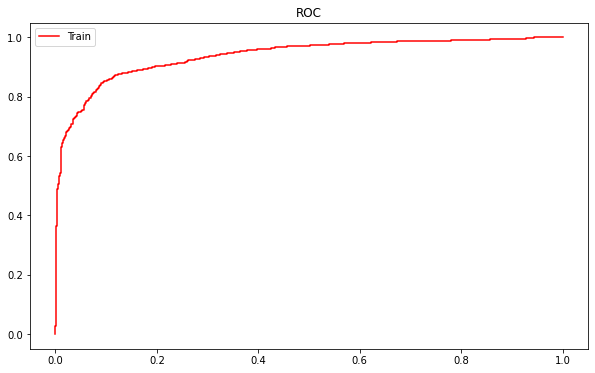

In [149]:
#krzywa ROC

y_pred_train_lr_proba = model.predict_proba(X_train_sc)
y_pred_lr_proba = model.predict_proba(X_test)

from sklearn.metrics import roc_curve

fpr_t, tpr_t, tresholds_t = roc_curve(y_train, y_pred_train_lr_proba[:,1])
# fpr, tpr, tresholds = roc_curve(y_test, y_pred_lr_proba[:,1])

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
# plt.plot(fpr, tpr, label ='Test', c = 'blue')
plt.plot(fpr_t, tpr_t, label = 'Train', c = 'red')
plt.legend()
plt.title('ROC')
plt.show()

In [150]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)

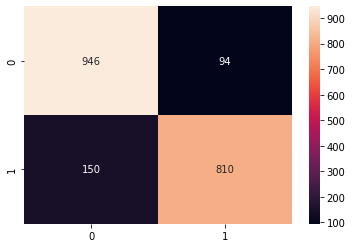

In [151]:
from sklearn.metrics import confusion_matrix      #wizualizacja macierzy, kt nam powstała
import seaborn as sns
%matplotlib inline

cm_train = confusion_matrix(y_train, y_pred_train)   #nasze dane ze zbioru  treningowego
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [152]:
cm_train

array([[946,  94],
       [150, 810]])

# Logistic Regression - wyniki

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')   #miary modelu na zbiorze treningowym
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.878
Precision: 0.8960176991150443
Recall: 0.84375
F1-Score: 0.8690987124463521


In [154]:
# cm = confusion_matrix(y_test, y_pred)   #nasze dane ze zbioru  treningowego
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()

# Logistic Regression z regularyzacją L2

In [155]:
#Regularyzacja Logistyczna z regularyzacją L2

rlr = LogisticRegression(solver = 'liblinear', penalty ='l2', C=0.5)
rlr.fit(X_train_sc, y_train)  

y_pred_train_rlr = rlr.predict(X_train_sc)
# y_pred_rlr = rlr.predict(X_test)

# print(y_pred_train_rlr)
# print(y_test.values)

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

# Logistic Regression z regularyzacją L2 - wyniki

In [157]:
print_results(calculate_metrics(y_train, y_pred_train_rlr), 'RLR L2')

Results for RLR L2
----
  Accuracy:  0.8745
  Precision: 0.8752240503610399
  Recall:    0.8745
  F1 score:  0.8742894804434728
  Mislabeled 251 out of 2000




# Grid Search dla Logistic Regression z regularyzacją L2

In [158]:
from sklearn.model_selection import GridSearchCV 
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(rlr, parameters)
searcher.fit(X_train_sc, y_train)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 10}
Best CV accuracy 0.8765000000000001


# KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=100, metric='manhattan')
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=100)

# KNN wyniki

In [160]:
print_results(calculate_metrics(y_train, y_pred_train), 'kNN')

Results for kNN
----
  Accuracy:  0.878
  Precision: 0.8789206123635425
  Recall:    0.878
  F1 score:  0.8777666329105787
  Mislabeled 244 out of 2000




# SVM

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(C = 0.1, kernel="linear")
svm.fit(X_train_sc,y_train)
y_pred_train = svm.predict(X_train_sc)
# y_pred = svm.predict(X_test)

# SVM - wyniki

In [162]:
confusion_matrix(y_train, y_pred_train)

array([[946,  94],
       [159, 801]])

In [163]:
print_results(calculate_metrics(y_train, y_pred_train), 'SVM')

Results for SVM
----
  Accuracy:  0.8735
  Precision: 0.8747630627670062
  Recall:    0.8735
  F1 score:  0.8732003593890386
  Mislabeled 253 out of 2000




# SVM z Grid Search - wyniki

In [164]:
svm = SVC(kernel="linear")
svm.fit(X_train_sc,y_train)

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train_sc, y_train)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 10}
Best CV accuracy 0.8775000000000001


In [165]:
# pipe = Pipeline(steps = [('sc', StandardScaler()), ('poly', PolynomialFeatures()), ('lr', LinearRegression())])
# pipe = pipe.fit(X_train, y_train)
# print(pipe.score(X_train, y_train))
# print(pipe.score(X_test, y_test))

# Bagging Classifier - wyniki

In [168]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bg=BaggingClassifier(base_estimator=DecisionTreeClassifier())
bg.fit(X_train_sc,y_train)
y_pred_train=bg.predict(X_train_sc)
print_results(calculate_metrics(y_train, y_pred_train), 'BaggingClassifier')

Results for BaggingClassifier
----
  Accuracy:  0.985
  Precision: 0.9852223948859415
  Recall:    0.985
  F1 score:  0.9849915630555073
  Mislabeled 30 out of 2000




# Modyfikacja danych testowych

In [170]:
X_test

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
845,66301,1021.671,402.0054,210.7404,67036,290.5461,0.8516,0.9890,0.7473,0.7982,1.9076,0.7227
1468,96171,1273.191,535.8372,229.1451,97004,349.9267,0.9039,0.9914,0.7532,0.7455,2.3384,0.6530
2456,57255,1071.249,475.9168,154.7253,57898,269.9988,0.9457,0.9889,0.6397,0.6270,3.0759,0.5673
1661,80286,1121.058,453.9591,226.7589,80997,319.7238,0.8663,0.9912,0.6955,0.8028,2.0019,0.7043
113,60145,938.701,357.5699,214.6178,60824,276.7291,0.7998,0.9888,0.6804,0.8577,1.6661,0.7739
...,...,...,...,...,...,...,...,...,...,...,...,...
563,69992,1057.088,434.2594,205.9645,70637,298.5240,0.8804,0.9909,0.6912,0.7871,2.1084,0.6874
304,75094,1106.910,453.4970,211.2793,75867,309.2130,0.8848,0.9898,0.6135,0.7702,2.1464,0.6818
2325,97132,1310.223,563.9474,220.6852,98229,351.6707,0.9203,0.9888,0.6676,0.7110,2.5554,0.6236
1413,84373,1193.596,486.5190,222.7008,85424,327.7606,0.8891,0.9877,0.6865,0.7442,2.1846,0.6737


In [171]:
y_test

845        Çerçevelik
1468    Ürgüp Sivrisi
2456    Ürgüp Sivrisi
1661    Ürgüp Sivrisi
113        Çerçevelik
            ...      
563        Çerçevelik
304        Çerçevelik
2325    Ürgüp Sivrisi
1413    Ürgüp Sivrisi
2122    Ürgüp Sivrisi
Name: Class, Length: 500, dtype: object

In [172]:
y_test = y_test.replace('Çerçevelik',0)
y_test = y_test.replace('Ürgüp Sivrisi',1)

In [174]:
df_sc_test = sc.transform(X_test)
X_test_sc = pd.DataFrame(df_sc_test, columns=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'])

In [176]:
# Regresja logistyczna
y_pred_lr = model.predict(X_test_sc)
print_results(calculate_metrics(y_test, y_pred_lr), 'LogisticRegression')



Results for LogisticRegression
----
  Accuracy:  0.892
  Precision: 0.8927012383900929
  Recall:    0.892
  F1 score:  0.8918334297281665
  Mislabeled 54 out of 500




In [180]:
bg.estimators_[0].feature_importances_

array([0.01090843, 0.0239213 , 0.0721512 , 0.05190989, 0.0068472 ,
       0.00907629, 0.54871733, 0.07530754, 0.03698234, 0.05532434,
       0.06779652, 0.04105762])

In [177]:
y_pred_bg = bg.predict(X_test_sc)
print_results(calculate_metrics(y_test, y_pred_bg), 'Bagging Classifier')

Results for Bagging Classifier
----
  Accuracy:  0.88
  Precision: 0.8806501547987616
  Recall:    0.88
  F1 score:  0.8798149219201851
  Mislabeled 60 out of 500


